In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from scipy import stats

In [2]:
import os
print(os.getcwd())

/Users/a123/Desktop/CMU/Capstone/CRS-Detection/notebooks


In [3]:
data_wear_01_15 = pd.read_excel("/Users/a123/Desktop/CMU/Capstone/CRS-Detection/Datasets/Annotated_WEAR_7001_7015_deID.xlsx", header = 7)
data_wear_16_30 = pd.read_excel("/Users/a123/Desktop/CMU/Capstone/CRS-Detection/Datasets/Annotated_WEAR_7016_7030_deID.xlsx", header = 7)

In [4]:
# Get rid of normalization summarized rows

data_wear_01_15_remove_normalized = data_wear_01_15.dropna(subset = ['PT_ID'])
data_wear_16_30_remove_normalized = data_wear_16_30.dropna(subset = ['PT_ID'])

In [25]:
# Columns doesn't match between these two datasets
# "['DOB', 'Age', 'ICANS on date', 'Dose (10^6 cells)', 'Dose (10^6 cells/kg)', 'abs Monocyte', 'ANC', 'ABS Lymphocyte count', 'Date of PD (1_24_24)', 'Date of Last Response Assess if No PD (1_24_24)'] not in index"

In [5]:
df = pd.concat([data_wear_01_15_remove_normalized, data_wear_16_30_remove_normalized], axis=0, ignore_index=True)

In [7]:
df

,Wearable Device ID,Sample ID,PT_ID,Agent (JNJ/BMS/Caribou),Date of CAR-T infusion,DOB,Age,Date of Sample,Days in relation to CAR-T infusion,Patient experienced CRS at any point (Yes/No),...,Patient experienced ICANS at any point (Yes/No),"ICANs on date (0 -no, 1 yes)",Abs Monocyte,Abs Neutrophil,Abs Lymphocyte,Dose,Weight at time of infusion,Total Cells infused (x10^6),DOP,Date of last response assesment
0,NaN,WEAR_7001_V1,7001.0,BMS,10/21/22,1939-11-16,82.986301,2022-10-21,0,Yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,WEAR_7001_CRS,7001.0,BMS,10/21/22,1939-11-16,82.986301,2022-10-22,1,Yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,WEAR_7001_V6,7001.0,BMS,10/21/22,1939-11-16,82.986301,2022-10-22,1,Yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,WEAR_7001_V7,7001.0,BMS,10/21/22,1939-11-16,82.986301,2022-10-23,2,Yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,WEAR_7001_V8,7001.0,BMS,10/21/22,1939-11-16,82.986301,2022-10-24,3,Yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
429,NaN,WEAR_7030_V11,7030.0,JNJ,2023-11-18 00:00:00,NaT,NaN,2023-11-27,9,Yes,...,No,0.0,0.2484,0.15,1.728,0.7x10^6 CART/KG,76.6,53.62,NaN,1/30/2024
430,NaN,WEAR_7030_V12,7030.0,JNJ,2023-11-18 00:00:00,NaT,NaN,2023-11-28,10,Yes,...,No,0.0,0.3780,0.12,2.730,0.7x10^6 CART/KG,76.6,53.62,NaN,1/30/2024
431,NaN,WEAR_7030_V13,7030.0,JNJ,2023-11-18 00:00:00,NaT,NaN,2023-11-29,11,Yes,...,No,0.0,0.3600,0.19,1.080,0.7x10^6 CART/KG,76.6,53.62,NaN,1/30/2024
432,NaN,WEAR_7030_V14,7030.0,JNJ,2023-11-18 00:00:00,NaT,NaN,2023-11-30,12,Yes,...,No,0.0,0.4590,0.36,0.646,0.7x10^6 CART/KG,76.6,53.62,NaN,1/30/2024


In [8]:
df = df.rename(columns={"CRS Grade ":"CRS Grade"})
columns_needed =['Sample ID','PT_ID','Agent (JNJ/BMS/Caribou)','Age','Date of Sample','Patient experienced CRS at any point (Yes/No)','CRS on date (0 No, 1 Yes)','CRS Grade', 'LAP TGF-beta-1', 'KIR3DL1', 'CXCL1', 'TNFSF14', 'IL33', 'TWEAK', 
 'PDGF subunit B', 'PDCD1', 'FASLG', 'CD28', 'CCL19', 'MCP-2', 
 'CCL4', 'IL15', 'Gal-1', 'PD-L1', 'CD27', 'CXCL5', 'IL5', 'HGF', 
 'GZMA', 'HO-1', 'CX3CL1', 'CXCL10', 'CD70', 'IL10', 'TNFRSF12A', 
 'CCL23', 'CD5', 'CCL3', 'MMP7', 'ARG1', 'NCR1', 'DCN', 'TNFRSF21', 
 'TNFRSF4', 'MIC-A/B', 'CCL17', 'ANGPT2', 'PTN', 'CXCL12', 
 'IFN-gamma', 'LAMP3', 'CASP-8', 'ICOSLG', 'MMP12', 'CXCL13', 
 'PD-L2', 'VEGFA', 'IL4', 'LAG3', 'IL12RB1', 'IL13', 'CCL20', 
 'TNF', 'KLRD1', 'GZMB', 'CD83', 'IL12', 'CSF-1'] 
df_Darren = df[columns_needed]
df_Darren

,Sample ID,PT_ID,Agent (JNJ/BMS/Caribou),Age,Date of Sample,Patient experienced CRS at any point (Yes/No),"CRS on date (0 No, 1 Yes)",CRS Grade,LAP TGF-beta-1,KIR3DL1,...,LAG3,IL12RB1,IL13,CCL20,TNF,KLRD1,GZMB,CD83,IL12,CSF-1
0,WEAR_7001_V1,7001.0,BMS,82.986301,2022-10-21,Yes,1.0,1.0,8.06576,0.6575,...,5.45556,2.96006,1.13701,8.961,3.78952,4.53595,0.26781,2.6916,5.68955,9.60013
1,WEAR_7001_CRS,7001.0,BMS,82.986301,2022-10-22,Yes,1.0,1.0,8.55827,1.1743,...,5.22607,3.29819,1.27501,9.83196,5.22946,4.58525,3.0442,2.93595,6.04079,9.90944
2,WEAR_7001_V6,7001.0,BMS,82.986301,2022-10-22,Yes,1.0,1.0,8.5425,0.89294,...,5.08071,3.43959,2.42115,9.57363,5.68099,4.63965,1.86368,3.05545,7.01733,10.14298
3,WEAR_7001_V7,7001.0,BMS,82.986301,2022-10-23,Yes,0.0,0.0,8.17752,0.62783,...,5.38096,3.66435,1.99264,8.15969,5.97459,5.02866,3.56284,3.18243,8.09645,10.0535
4,WEAR_7001_V8,7001.0,BMS,82.986301,2022-10-24,Yes,0.0,0.0,8.2695,0.62438,...,6.31011,3.66614,1.48822,7.86186,6.24313,5.93346,4.73769,3.80248,8.19106,10.04966
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
429,WEAR_7030_V11,7030.0,JNJ,NaN,2023-11-27,Yes,0.0,0.0,8.38179,1.75886,...,6.36772,4.15843,2.11401,12.40419,5.47644,6.53635,6.37216,3.011,5.87419,9.84772
430,WEAR_7030_V12,7030.0,JNJ,NaN,2023-11-28,Yes,0.0,0.0,8.67039,1.91674,...,6.04796,3.87028,1.28486,8.69139,5.15134,6.87243,5.34165,3.30534,6.24324,10.11793
431,WEAR_7030_V13,7030.0,JNJ,NaN,2023-11-29,Yes,0.0,0.0,8.36981,1.65431,...,5.62998,3.21484,0.75199,10.00934,4.70588,6.24814,3.66923,3.11226,6.06368,9.7969
432,WEAR_7030_V14,7030.0,JNJ,NaN,2023-11-30,Yes,0.0,0.0,8.23854,1.32057,...,5.3905,2.83273,0.75357,8.8618,4.50333,5.57667,3.00101,3.17512,6.32569,9.60039


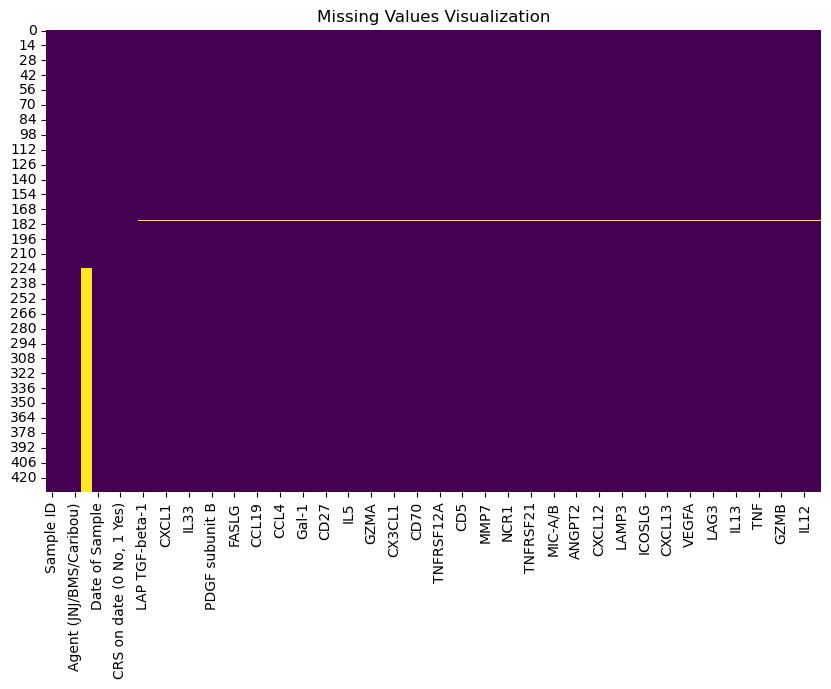

In [10]:
plt.figure(figsize=(10, 6))
sns.heatmap(df_Darren.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Visualization")
plt.show()

In [60]:
df_Darren.isnull().sum().sort_values(ascending=False)

Age                          210
IL4                            7
IL5                            6
IL13                           5
NCR1                           2
                            ... 
Date of Sample                 0
PT_ID                          0
CRS on date (0 No, 1 Yes)      0
CRS Grade                      0
Sample ID                      0
Length: 68, dtype: int64

In [27]:
df_Darren.dtypes

Sample ID                   object
PT_ID                      float64
KIR3DL1                     object
Agent (JNJ/BMS/Caribou)     object
Age                        float64
                            ...   
KLRD1                       object
GZMB                        object
CD83                        object
IL12                        object
CSF-1                       object
Length: 70, dtype: object

In [44]:
cols_to_convert = ['KIR3DL1', 'LAP TGF-beta-1','CXCL1', 'TNFSF14', 'IL33', 'TWEAK', 
 'PDGF subunit B', 'PDCD1', 'FASLG', 'CD28', 'CCL19', 'MCP-2', 
 'CCL4', 'IL15', 'Gal-1', 'PD-L1', 'CD27', 'CXCL5', 'IL5', 'HGF', 
 'GZMA', 'HO-1', 'CX3CL1', 'CXCL10', 'CD70', 'IL10', 'TNFRSF12A', 
 'CCL23', 'CD5', 'CCL3', 'MMP7', 'ARG1', 'NCR1', 'DCN', 'TNFRSF21', 
 'TNFRSF4', 'MIC-A/B', 'CCL17', 'ANGPT2', 'PTN', 'CXCL12', 
 'IFN-gamma', 'LAMP3', 'CASP-8', 'ICOSLG', 'MMP12', 'CXCL13', 
 'PD-L2', 'VEGFA', 'IL4', 'LAG3', 'IL12RB1', 'IL13', 'CCL20', 
 'TNF', 'KLRD1', 'GZMB', 'CD83', 'IL12', 'CSF-1'] 
df_Darren[cols_to_convert] = df_Darren[cols_to_convert].apply(pd.to_numeric, errors='coerce')

/var/folders/9q/_q_h4th94vj56dq6c3yv3gj80000gn/T/ipykernel_19052/2887281366.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Darren[cols_to_convert] = df_Darren[cols_to_convert].apply(pd.to_numeric, errors='coerce')


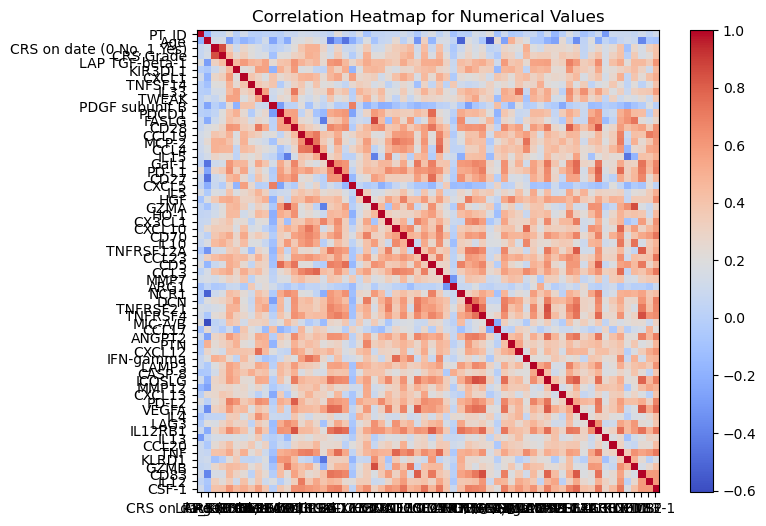

In [48]:
#draw a correlation heatmap
numerical_df = df_Darren.select_dtypes(include=[np.number])
corr_matrix = numerical_df.corr()

plt.figure(figsize=(8,6))
plt.imshow(corr_matrix, cmap="coolwarm", interpolation="nearest")
plt.colorbar()
plt.xticks(range(len(numerical_df.columns)),numerical_df.columns)
plt.yticks(range(len(numerical_df.columns)), numerical_df.columns)
plt.title("Correlation Heatmap for Numerical Values")
plt.show()

In [65]:
numerical_df.describe()

,PT_ID,Age,"CRS on date (0 No, 1 Yes)",CRS Grade,LAP TGF-beta-1,KIR3DL1,CXCL1,TNFSF14,IL33,TWEAK,...,LAG3,IL12RB1,IL13,CCL20,TNF,KLRD1,GZMB,CD83,IL12,CSF-1
count,434.000000,224.000000,434.000000,434.000000,433.000000,433.000000,433.000000,433.000000,433.000000,433.000000,...,433.00000,433.000000,429.000000,433.000000,433.000000,433.000000,433.000000,433.000000,433.000000,433.000000
mean,7015.322581,64.289848,0.170507,0.209677,8.530444,1.173010,8.277329,4.123963,-0.781756,8.568122,...,5.26640,3.130135,1.186306,7.906773,4.889274,4.409979,4.497435,3.065559,6.373889,9.885214
std,8.791771,9.351457,0.376512,0.547763,0.649480,0.839423,0.967347,0.896796,0.729372,0.401485,...,1.31628,1.080638,0.658955,1.255980,1.040503,1.190967,2.232926,0.904534,1.297141,0.441759
min,7001.000000,48.517808,0.000000,0.000000,7.323960,-0.714560,5.663140,1.835180,-1.507760,7.236100,...,3.01254,0.385810,-0.261120,4.606370,2.864390,1.671140,-0.179420,1.790260,2.450090,8.387590
25%,7008.000000,58.416438,0.000000,0.000000,8.148260,0.725310,7.651150,3.525800,-1.017360,8.353600,...,4.37885,2.434190,0.738570,7.134920,4.118890,3.599980,3.044200,2.554640,5.492040,9.641630
50%,7015.000000,65.972603,0.000000,0.000000,8.472470,1.022150,8.194830,4.071710,-0.882350,8.531130,...,5.04641,2.918720,1.146090,7.727800,4.784530,4.444440,4.104120,2.814590,6.248010,9.846590
75%,7023.000000,68.895890,0.000000,0.000000,8.752470,1.388330,8.805010,4.586990,-0.716500,8.737730,...,5.93439,3.605570,1.486060,8.669180,5.500210,5.175970,5.911660,3.203580,7.074720,10.111510
max,7030.000000,82.986301,1.000000,4.000000,11.872700,5.937030,12.095270,8.026390,6.263320,10.903500,...,10.33052,9.214110,4.568040,12.404190,8.399490,7.408820,12.645120,6.654910,11.949550,12.661070


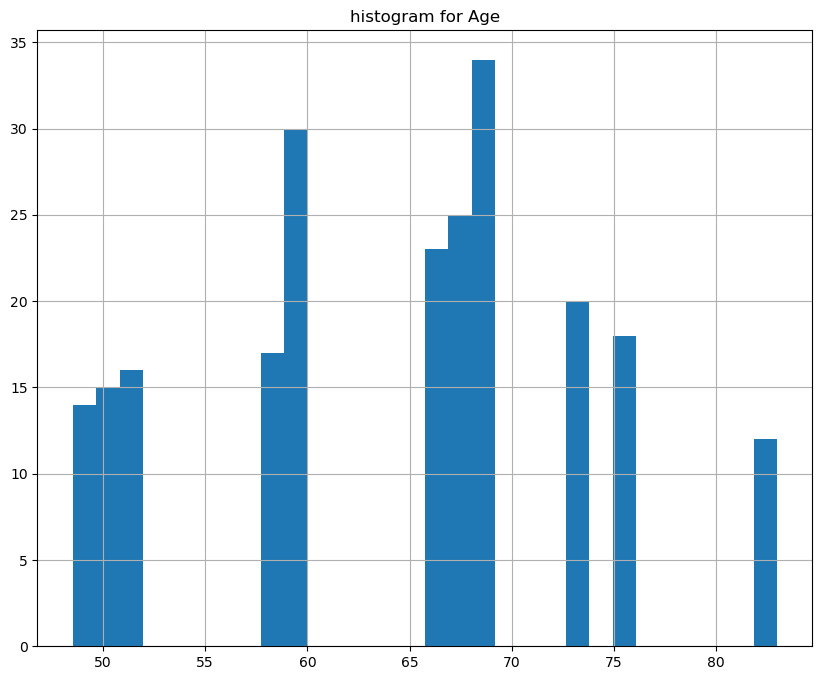

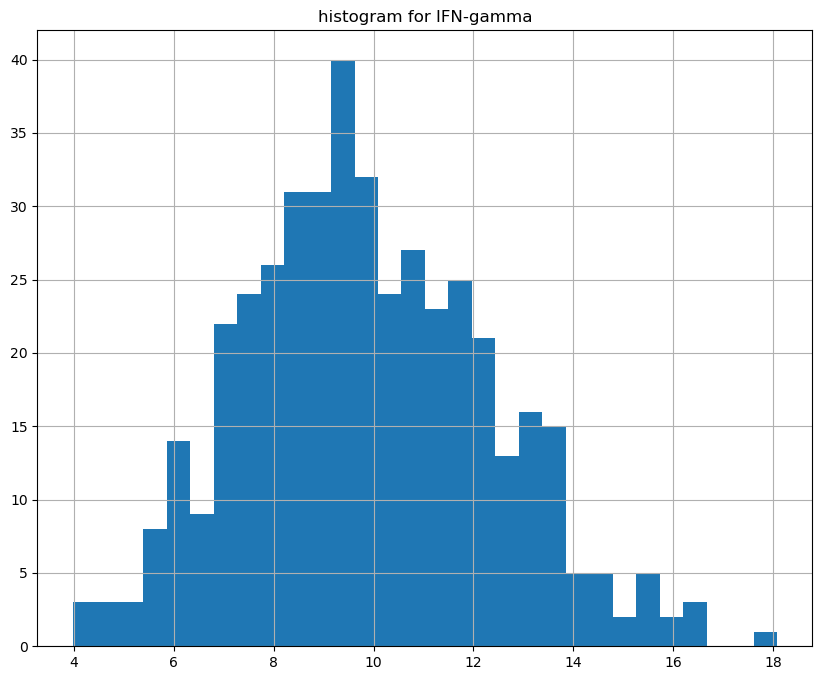

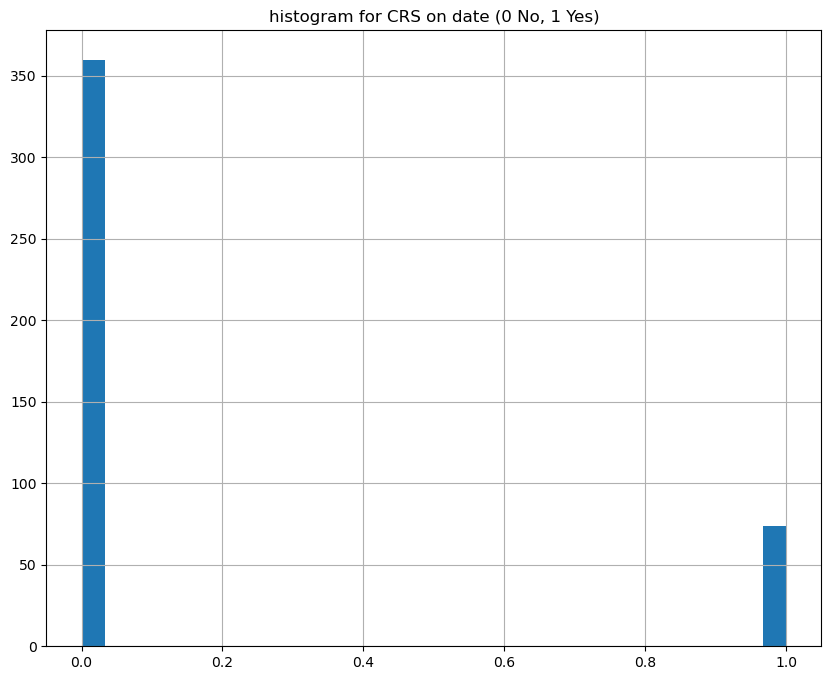

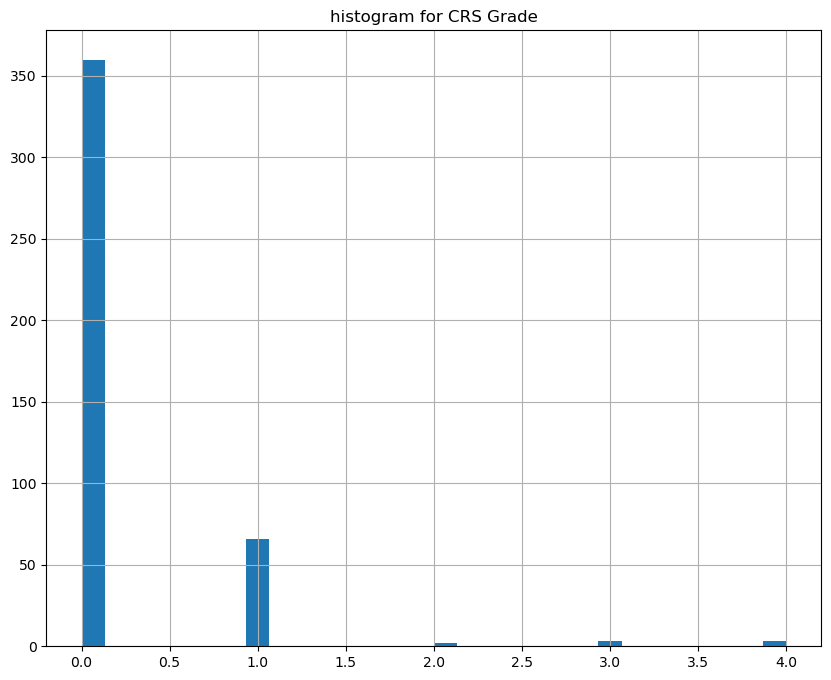

In [70]:
col_interested = ['Age','IFN-gamma','CRS on date (0 No, 1 Yes)','CRS Grade']
for col in col_interested:
    plt.figure(figsize=(8,6))
    numerical_df[col].hist(bins=30, figsize=(10, 8))
    plt.title(f"histogram for {col}")
    plt.show()

In [49]:
corr_pairs = corr_matrix.unstack()
corr_pairs
sorted_corr = corr_pairs[corr_pairs != 1].sort_values(ascending=False).drop_duplicates()
sorted_corr

GZMA                       FASLG        0.870300
GZMB                       GZMA         0.853098
TNFRSF21                   ICOSLG       0.846965
CRS on date (0 No, 1 Yes)  CRS Grade    0.845269
TNFRSF4                    CD83         0.845084
                                          ...   
KLRD1                      IL15        -0.453627
Age                        CD27        -0.455858
                           Gal-1       -0.457391
NCR1                       Age         -0.521606
MIC-A/B                    Age         -0.606146
Length: 2016, dtype: float64

In [50]:
corr_matrix['CRS on date (0 No, 1 Yes)'].sort_values(ascending=False).head(10)

CRS on date (0 No, 1 Yes)    1.000000
CRS Grade                    0.845269
IFN-gamma                    0.501346
CCL4                         0.489875
MCP-2                        0.486859
IL10                         0.444577
CCL23                        0.430744
CCL3                         0.410795
TNF                          0.403217
CSF-1                        0.399689
Name: CRS on date (0 No, 1 Yes), dtype: float64

In [51]:
corr_matrix['CRS on date (0 No, 1 Yes)'].sort_values(ascending=False).tail(10)

CXCL5             0.081244
TWEAK             0.074840
PT_ID             0.071254
CCL17             0.063959
IL4               0.051053
PDCD1             0.045064
MIC-A/B           0.031481
PDGF subunit B    0.003097
ARG1             -0.048232
KLRD1            -0.095422
Name: CRS on date (0 No, 1 Yes), dtype: float64

/var/folders/9q/_q_h4th94vj56dq6c3yv3gj80000gn/T/ipykernel_19052/3349026187.py:21: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(
/var/folders/9q/_q_h4th94vj56dq6c3yv3gj80000gn/T/ipykernel_19052/3349026187.py:25: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(


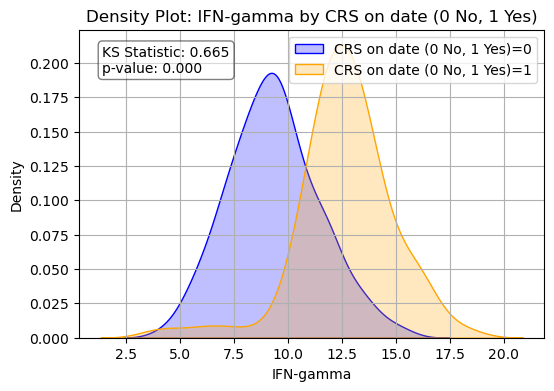

/var/folders/9q/_q_h4th94vj56dq6c3yv3gj80000gn/T/ipykernel_19052/3349026187.py:21: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(
/var/folders/9q/_q_h4th94vj56dq6c3yv3gj80000gn/T/ipykernel_19052/3349026187.py:25: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(


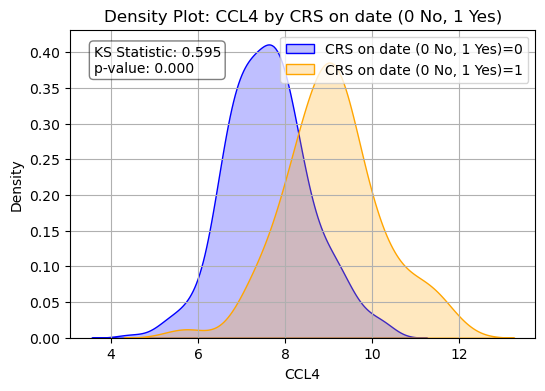

/var/folders/9q/_q_h4th94vj56dq6c3yv3gj80000gn/T/ipykernel_19052/3349026187.py:21: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(
/var/folders/9q/_q_h4th94vj56dq6c3yv3gj80000gn/T/ipykernel_19052/3349026187.py:25: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(


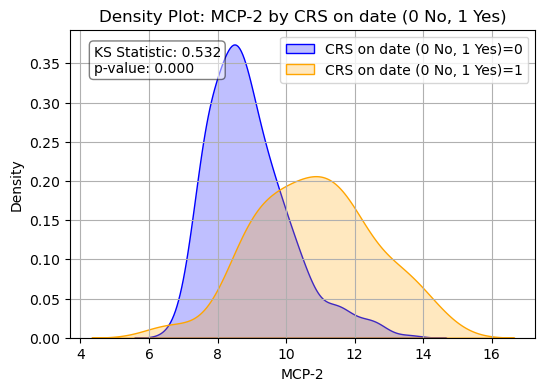

/var/folders/9q/_q_h4th94vj56dq6c3yv3gj80000gn/T/ipykernel_19052/3349026187.py:21: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(
/var/folders/9q/_q_h4th94vj56dq6c3yv3gj80000gn/T/ipykernel_19052/3349026187.py:25: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(


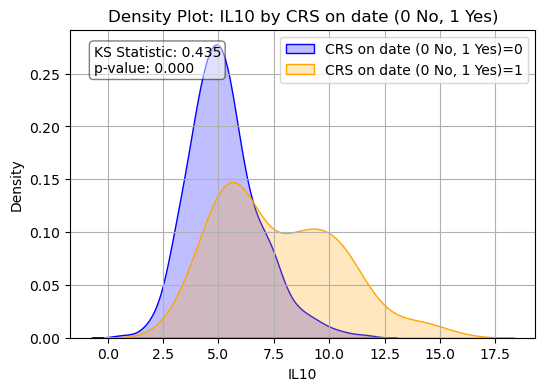

/var/folders/9q/_q_h4th94vj56dq6c3yv3gj80000gn/T/ipykernel_19052/3349026187.py:21: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(
/var/folders/9q/_q_h4th94vj56dq6c3yv3gj80000gn/T/ipykernel_19052/3349026187.py:25: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(


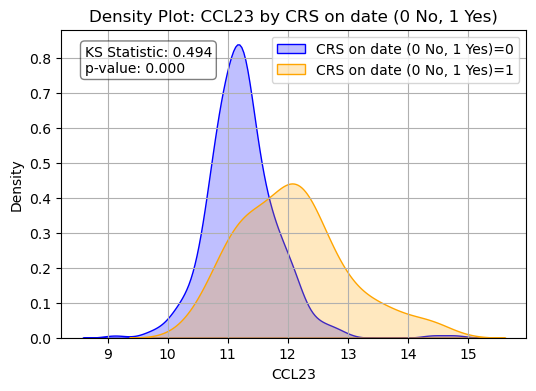

/var/folders/9q/_q_h4th94vj56dq6c3yv3gj80000gn/T/ipykernel_19052/3349026187.py:21: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(
/var/folders/9q/_q_h4th94vj56dq6c3yv3gj80000gn/T/ipykernel_19052/3349026187.py:25: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(


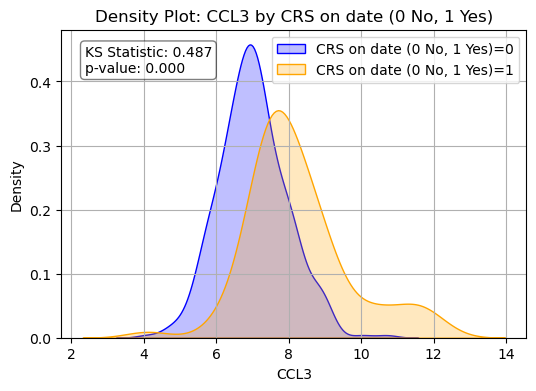

/var/folders/9q/_q_h4th94vj56dq6c3yv3gj80000gn/T/ipykernel_19052/3349026187.py:21: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(
/var/folders/9q/_q_h4th94vj56dq6c3yv3gj80000gn/T/ipykernel_19052/3349026187.py:25: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(


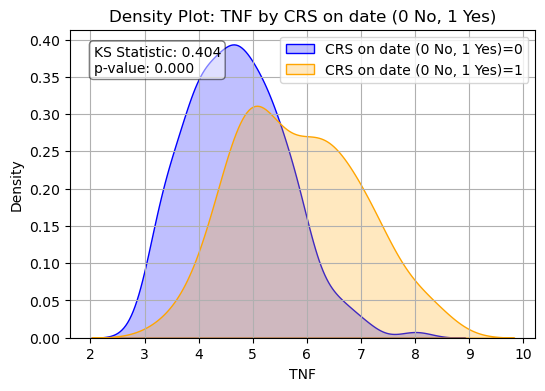

/var/folders/9q/_q_h4th94vj56dq6c3yv3gj80000gn/T/ipykernel_19052/3349026187.py:21: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(
/var/folders/9q/_q_h4th94vj56dq6c3yv3gj80000gn/T/ipykernel_19052/3349026187.py:25: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(


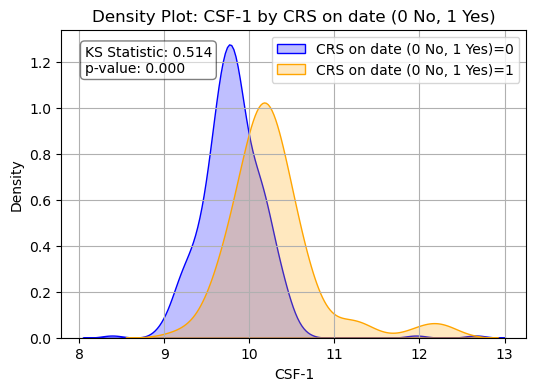

/var/folders/9q/_q_h4th94vj56dq6c3yv3gj80000gn/T/ipykernel_19052/3349026187.py:21: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(
/var/folders/9q/_q_h4th94vj56dq6c3yv3gj80000gn/T/ipykernel_19052/3349026187.py:25: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(


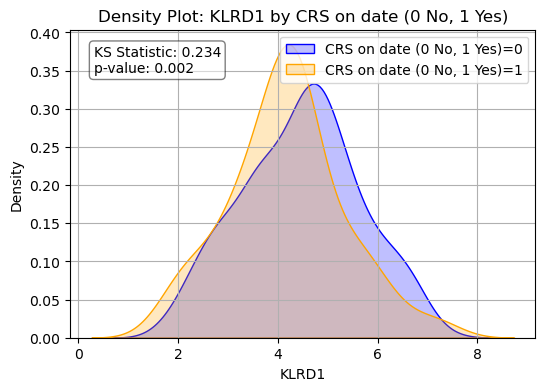


Kolmogorov-Smirnov Test Results:
    Variable  KS Statistic       p-value
0  IFN-gamma      0.665221  2.223209e-26
1       CCL4      0.594711  9.618550e-21
2      MCP-2      0.532344  2.066975e-16
3       IL10      0.434817  6.663005e-11
4      CCL23      0.494216  4.264758e-14
5       CCL3      0.486568  1.160986e-13
6        TNF      0.403881  2.012370e-09
7      CSF-1      0.513775  2.942001e-15
8      KLRD1      0.233980  2.075453e-03


In [93]:
# Initialize lists to store KS test results
ks_results = []
columns_list = ['MCP-2', 'IL10', 'HGF','IL10','CCL23','CCL3','CCL4','IFN-gamma','CD70','PDGF subunit B']  
target_var = 'CRS Grade' 

for col in columns_list:
    # Extract data for each group
    data_group0 = numerical_df[numerical_df[target_var] == 0][col].dropna()
    data_group1 = numerical_df[numerical_df[target_var] == 1][col].dropna()
    
    # Perform KS Test
    ks_stat, ks_pvalue = stats.ks_2samp(data_group0, data_group1)
    
    # Store the results
    ks_results.append({
        'Variable': col,
        'KS Statistic': ks_stat,
        'p-value': ks_pvalue
    })
    
    # Plot density plots
    plt.figure(figsize=(6, 4))  
    sns.kdeplot(
        data_group0,  
        label=f'{target_var}=0', shade=True, color="blue"
    )
    sns.kdeplot(
        data_group1,  
        label=f'{target_var}=1', shade=True, color="orange"
    )
    
    plt.title(f'Density Plot: {col} by {target_var}')  
    plt.xlabel(col) 
    plt.ylabel('Density')  
    plt.legend()
    plt.grid(True)
    
    # Annotate the plot with KS test results
    plt.text(0.05, 0.95, f'KS Statistic: {ks_stat:.3f}\np-value: {ks_pvalue:.3f}', 
             transform=plt.gca().transAxes, 
             verticalalignment='top',
             bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))
    
    plt.show()

ks_results_df = pd.DataFrame(ks_results)

# Display the results
print("\nKolmogorov-Smirnov Test Results:")
print(ks_results_df)

Key Effects of IFN-γ on CRS:
Pro-inflammatory Cytokine Amplification:
IFN-γ is a potent cytokine that stimulates the release of other pro-inflammatory cytokines such as TNF-α, IL-6, and IL-1. These cytokines collectively contribute to the intense inflammatory response seen in CRS. The overproduction of IFN-γ exacerbates the overall cytokine storm, making CRS more severe.

Activation of Immune Cells:
IFN-γ activates several types of immune cells, including macrophages, T-cells, and natural killer (NK) cells. This activation leads to increased production of inflammatory mediators and further perpetuates the cytokine storm, intensifying tissue damage and systemic inflammation.

Endothelial Activation and Vascular Permeability:
IFN-γ affects the vascular system by activating endothelial cells, leading to increased vascular permeability. This can result in fluid leakage from blood vessels into tissues, causing edema, hypotension, and potentially leading to organ dysfunction, which are hallmark symptoms of severe CRS.

Fever and Systemic Inflammatory Response:
As a pyrogenic cytokine, IFN-γ induces fever, which is a common symptom in CRS. The systemic inflammation triggered by IFN-γ contributes to fever, chills, and other flu-like symptoms during the initial stages of CRS.

Tissue Damage:
Prolonged exposure to elevated levels of IFN-γ and other cytokines can cause direct tissue damage. This is particularly concerning in vital organs such as the liver, lungs, and kidneys, which are often affected during severe cases of CRS.

Immune Dysregulation:
IFN-γ can promote immune dysregulation by pushing the immune response into a hyperactive state. This can lead to an inability to control inflammation and to a loss of normal immune regulation, further worsening the condition.

What does QC deviation mean? Why do we need QC?

In [53]:
numerical_df["CRS Grade"].unique()

array([1., 0., 3., 2., 4.])

In [63]:
corr_matrix['CRS Grade'].sort_values(ascending = False).head(10)

CRS Grade                    1.000000
CRS on date (0 No, 1 Yes)    0.845269
MCP-2                        0.501892
IL10                         0.499173
HGF                          0.498680
CCL23                        0.484212
CCL3                         0.474715
CCL4                         0.472807
IFN-gamma                    0.454229
CD70                         0.445687
Name: CRS Grade, dtype: float64

In [71]:
corr_matrix['CRS Grade'].sort_values(ascending = False).tail(10)

TNFRSF12A         0.142691
CXCL12            0.132546
MIC-A/B           0.086292
PT_ID             0.065530
IL4               0.056662
KLRD1            -0.000312
CXCL5            -0.021506
ARG1             -0.027513
CCL17            -0.029487
PDGF subunit B   -0.103146
Name: CRS Grade, dtype: float64

/var/folders/9q/_q_h4th94vj56dq6c3yv3gj80000gn/T/ipykernel_19052/1587779081.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(
/var/folders/9q/_q_h4th94vj56dq6c3yv3gj80000gn/T/ipykernel_19052/1587779081.py:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(
/var/folders/9q/_q_h4th94vj56dq6c3yv3gj80000gn/T/ipykernel_19052/1587779081.py:18: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(
/var/folders/9q/_q_h4th94vj56dq6c3yv3gj80000gn/T/ipykernel_19052/1587779081.py:23: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.



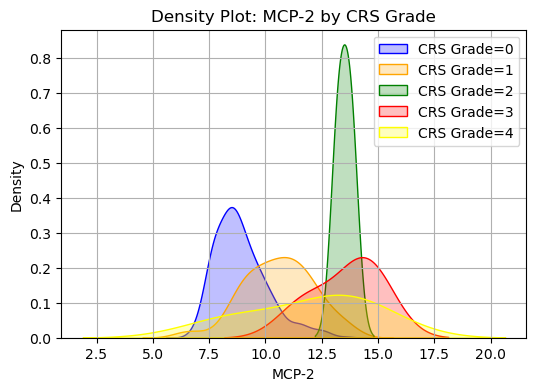

/var/folders/9q/_q_h4th94vj56dq6c3yv3gj80000gn/T/ipykernel_19052/1587779081.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(
/var/folders/9q/_q_h4th94vj56dq6c3yv3gj80000gn/T/ipykernel_19052/1587779081.py:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(
/var/folders/9q/_q_h4th94vj56dq6c3yv3gj80000gn/T/ipykernel_19052/1587779081.py:18: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(
/var/folders/9q/_q_h4th94vj56dq6c3yv3gj80000gn/T/ipykernel_19052/1587779081.py:23: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.



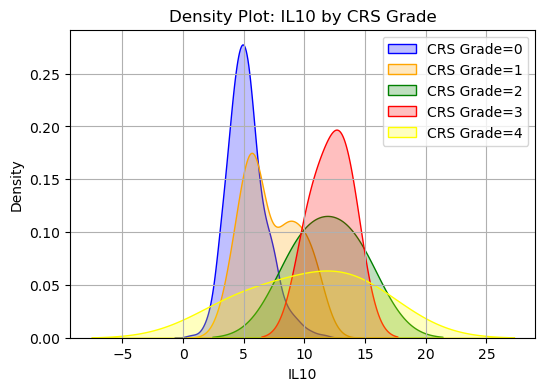

/var/folders/9q/_q_h4th94vj56dq6c3yv3gj80000gn/T/ipykernel_19052/1587779081.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(
/var/folders/9q/_q_h4th94vj56dq6c3yv3gj80000gn/T/ipykernel_19052/1587779081.py:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(
/var/folders/9q/_q_h4th94vj56dq6c3yv3gj80000gn/T/ipykernel_19052/1587779081.py:18: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(
/var/folders/9q/_q_h4th94vj56dq6c3yv3gj80000gn/T/ipykernel_19052/1587779081.py:23: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.



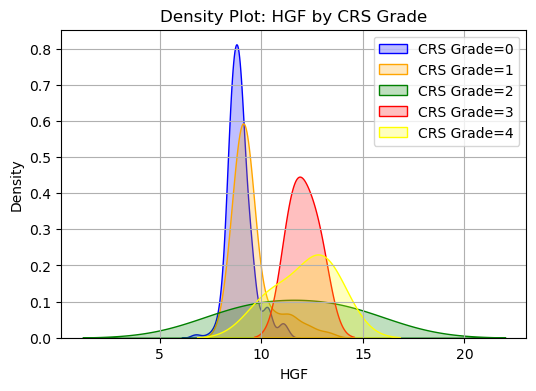

/var/folders/9q/_q_h4th94vj56dq6c3yv3gj80000gn/T/ipykernel_19052/1587779081.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(
/var/folders/9q/_q_h4th94vj56dq6c3yv3gj80000gn/T/ipykernel_19052/1587779081.py:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(
/var/folders/9q/_q_h4th94vj56dq6c3yv3gj80000gn/T/ipykernel_19052/1587779081.py:18: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(
/var/folders/9q/_q_h4th94vj56dq6c3yv3gj80000gn/T/ipykernel_19052/1587779081.py:23: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.



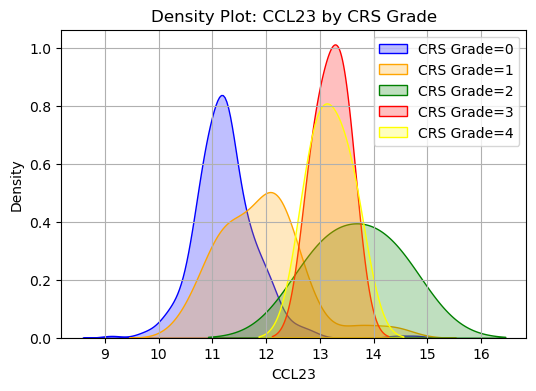

/var/folders/9q/_q_h4th94vj56dq6c3yv3gj80000gn/T/ipykernel_19052/1587779081.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(
/var/folders/9q/_q_h4th94vj56dq6c3yv3gj80000gn/T/ipykernel_19052/1587779081.py:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(
/var/folders/9q/_q_h4th94vj56dq6c3yv3gj80000gn/T/ipykernel_19052/1587779081.py:18: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(
/var/folders/9q/_q_h4th94vj56dq6c3yv3gj80000gn/T/ipykernel_19052/1587779081.py:23: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.



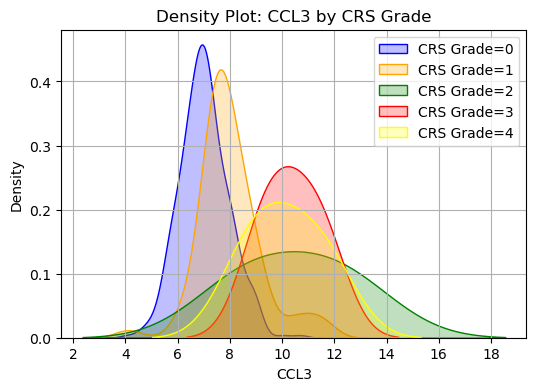

/var/folders/9q/_q_h4th94vj56dq6c3yv3gj80000gn/T/ipykernel_19052/1587779081.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(
/var/folders/9q/_q_h4th94vj56dq6c3yv3gj80000gn/T/ipykernel_19052/1587779081.py:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(
/var/folders/9q/_q_h4th94vj56dq6c3yv3gj80000gn/T/ipykernel_19052/1587779081.py:18: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(
/var/folders/9q/_q_h4th94vj56dq6c3yv3gj80000gn/T/ipykernel_19052/1587779081.py:23: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.



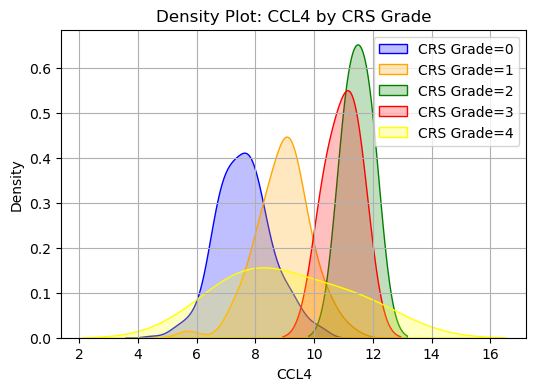

/var/folders/9q/_q_h4th94vj56dq6c3yv3gj80000gn/T/ipykernel_19052/1587779081.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(
/var/folders/9q/_q_h4th94vj56dq6c3yv3gj80000gn/T/ipykernel_19052/1587779081.py:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(
/var/folders/9q/_q_h4th94vj56dq6c3yv3gj80000gn/T/ipykernel_19052/1587779081.py:18: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(
/var/folders/9q/_q_h4th94vj56dq6c3yv3gj80000gn/T/ipykernel_19052/1587779081.py:23: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.



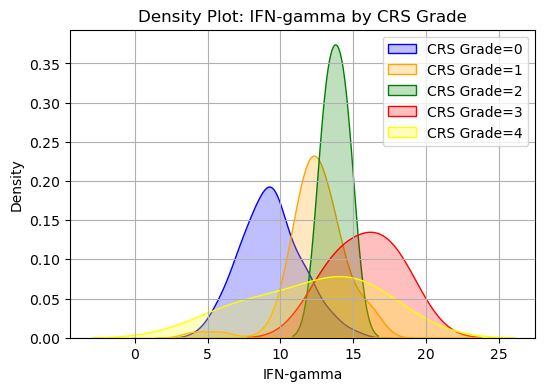

/var/folders/9q/_q_h4th94vj56dq6c3yv3gj80000gn/T/ipykernel_19052/1587779081.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(
/var/folders/9q/_q_h4th94vj56dq6c3yv3gj80000gn/T/ipykernel_19052/1587779081.py:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(
/var/folders/9q/_q_h4th94vj56dq6c3yv3gj80000gn/T/ipykernel_19052/1587779081.py:18: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(
/var/folders/9q/_q_h4th94vj56dq6c3yv3gj80000gn/T/ipykernel_19052/1587779081.py:23: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.



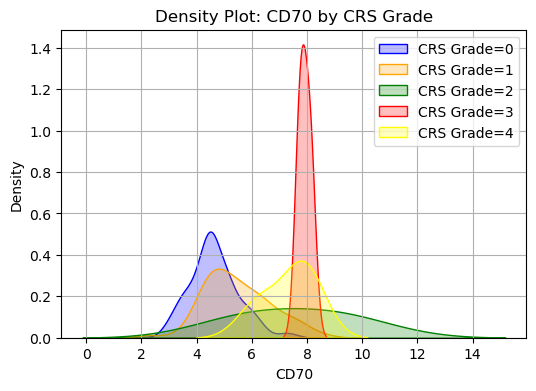

/var/folders/9q/_q_h4th94vj56dq6c3yv3gj80000gn/T/ipykernel_19052/1587779081.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(
/var/folders/9q/_q_h4th94vj56dq6c3yv3gj80000gn/T/ipykernel_19052/1587779081.py:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(
/var/folders/9q/_q_h4th94vj56dq6c3yv3gj80000gn/T/ipykernel_19052/1587779081.py:18: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(
/var/folders/9q/_q_h4th94vj56dq6c3yv3gj80000gn/T/ipykernel_19052/1587779081.py:23: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.



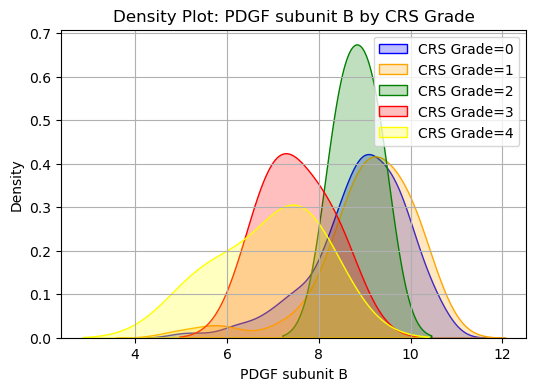

In [96]:
columns_list = ['MCP-2', 'IL10', 'HGF','CCL23','CCL3','CCL4','IFN-gamma','CD70','PDGF subunit B']  
target_var = 'CRS Grade' 


for col in columns_list:
    plt.figure(figsize=(6, 4))  
    
    sns.kdeplot(
        numerical_df[numerical_df[target_var] == 0][col].dropna(),  
        label=f'{target_var}=0', shade=True, color="blue"
    )
    
    sns.kdeplot(
        numerical_df[numerical_df[target_var] == 1][col].dropna(),  
        label=f'{target_var}=1', shade=True, color="orange"
    )

    sns.kdeplot(
        numerical_df[numerical_df[target_var] == 2][col].dropna(),  
        label=f'{target_var}=2', shade=True, color="green"
    )

    sns.kdeplot(
        numerical_df[numerical_df[target_var] == 3][col].dropna(),  
        label=f'{target_var}=3', shade=True, color="red"
    )

    sns.kdeplot(
        numerical_df[numerical_df[target_var] == 4][col].dropna(),  
        label=f'{target_var}=4', shade=True, color="yellow"
    )
    
    plt.title(f'Density Plot: {col} by {target_var}')  
    plt.xlabel(col) 
    plt.ylabel('Density')  
    plt.legend()  
    plt.grid(True) 
    plt.show()

/var/folders/9q/_q_h4th94vj56dq6c3yv3gj80000gn/T/ipykernel_19052/522186879.py:32: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(
/var/folders/9q/_q_h4th94vj56dq6c3yv3gj80000gn/T/ipykernel_19052/522186879.py:32: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(
/var/folders/9q/_q_h4th94vj56dq6c3yv3gj80000gn/T/ipykernel_19052/522186879.py:32: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(
/var/folders/9q/_q_h4th94vj56dq6c3yv3gj80000gn/T/ipykernel_19052/522186879.py:32: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  s

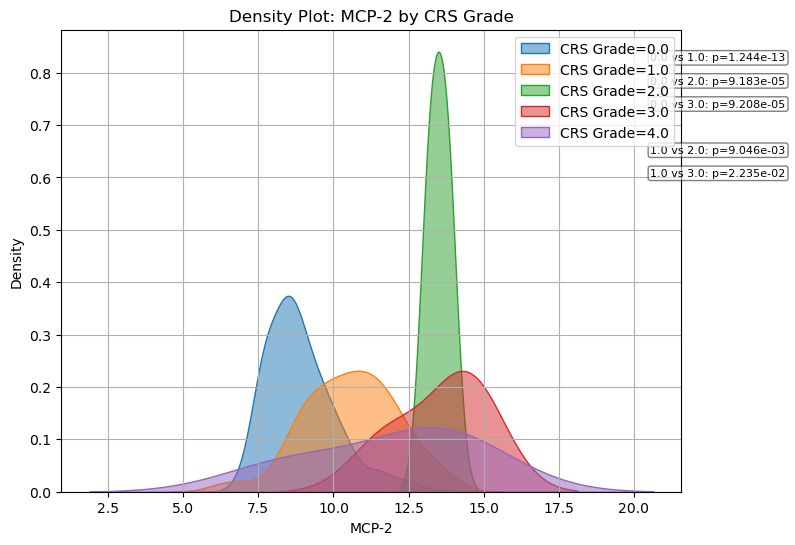

/var/folders/9q/_q_h4th94vj56dq6c3yv3gj80000gn/T/ipykernel_19052/522186879.py:32: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(
/var/folders/9q/_q_h4th94vj56dq6c3yv3gj80000gn/T/ipykernel_19052/522186879.py:32: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(
/var/folders/9q/_q_h4th94vj56dq6c3yv3gj80000gn/T/ipykernel_19052/522186879.py:32: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(
/var/folders/9q/_q_h4th94vj56dq6c3yv3gj80000gn/T/ipykernel_19052/522186879.py:32: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  s

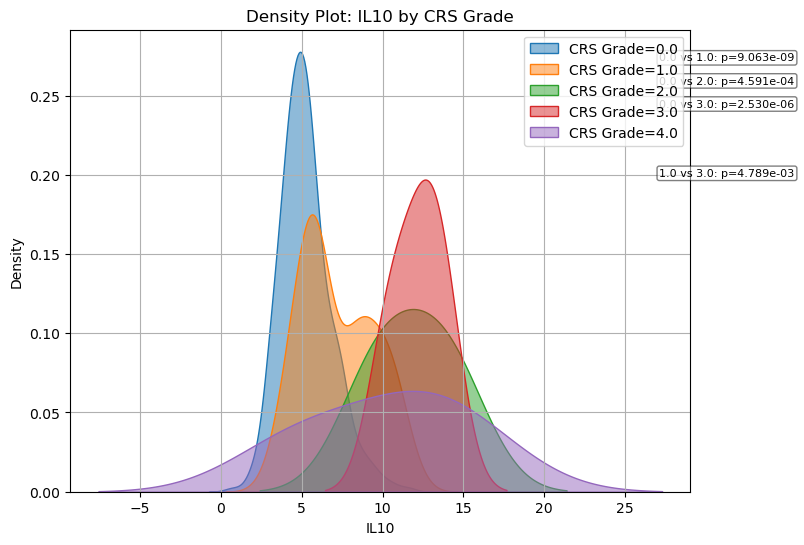

/var/folders/9q/_q_h4th94vj56dq6c3yv3gj80000gn/T/ipykernel_19052/522186879.py:32: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(
/var/folders/9q/_q_h4th94vj56dq6c3yv3gj80000gn/T/ipykernel_19052/522186879.py:32: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(
/var/folders/9q/_q_h4th94vj56dq6c3yv3gj80000gn/T/ipykernel_19052/522186879.py:32: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(
/var/folders/9q/_q_h4th94vj56dq6c3yv3gj80000gn/T/ipykernel_19052/522186879.py:32: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  s

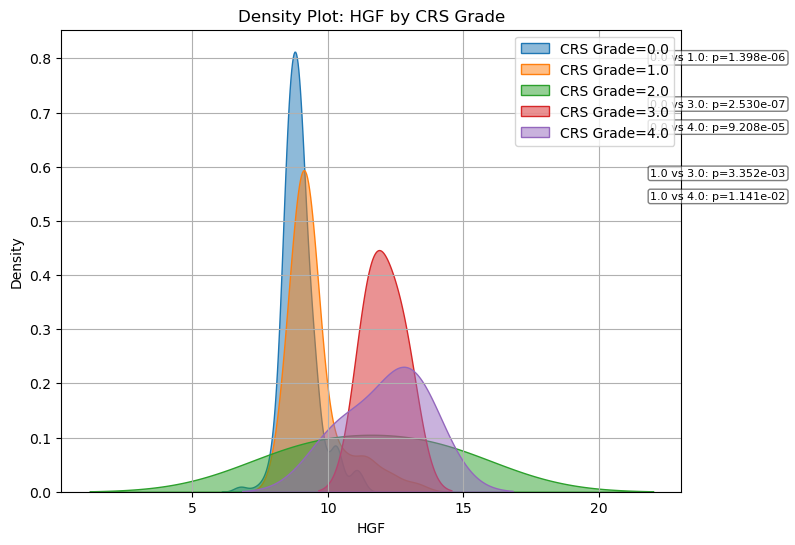

/var/folders/9q/_q_h4th94vj56dq6c3yv3gj80000gn/T/ipykernel_19052/522186879.py:32: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(
/var/folders/9q/_q_h4th94vj56dq6c3yv3gj80000gn/T/ipykernel_19052/522186879.py:32: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(
/var/folders/9q/_q_h4th94vj56dq6c3yv3gj80000gn/T/ipykernel_19052/522186879.py:32: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(
/var/folders/9q/_q_h4th94vj56dq6c3yv3gj80000gn/T/ipykernel_19052/522186879.py:32: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  s

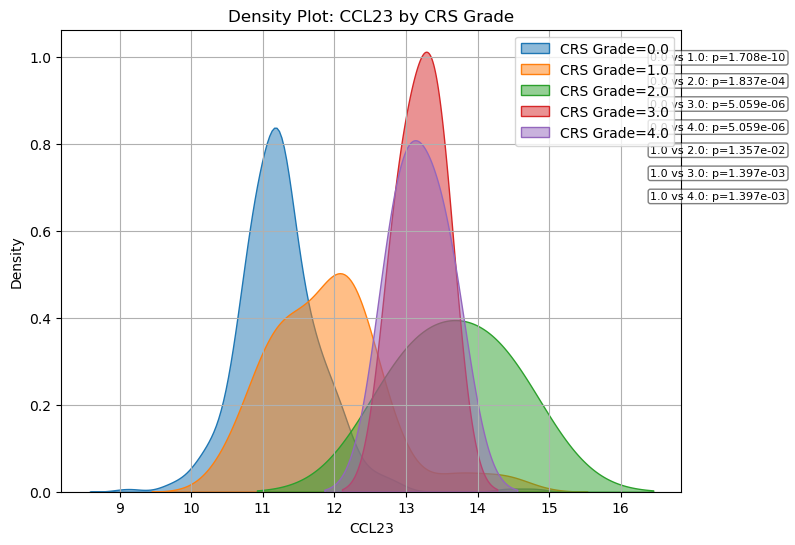

/var/folders/9q/_q_h4th94vj56dq6c3yv3gj80000gn/T/ipykernel_19052/522186879.py:32: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(
/var/folders/9q/_q_h4th94vj56dq6c3yv3gj80000gn/T/ipykernel_19052/522186879.py:32: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(
/var/folders/9q/_q_h4th94vj56dq6c3yv3gj80000gn/T/ipykernel_19052/522186879.py:32: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(
/var/folders/9q/_q_h4th94vj56dq6c3yv3gj80000gn/T/ipykernel_19052/522186879.py:32: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  s

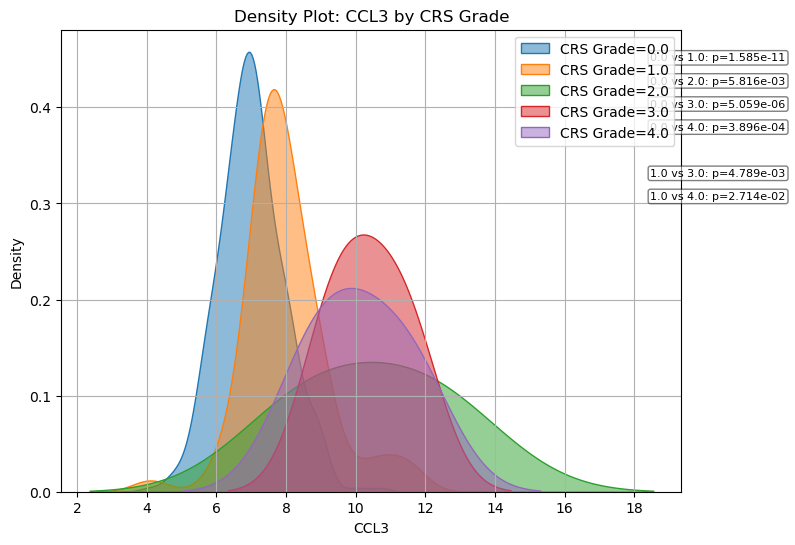

/var/folders/9q/_q_h4th94vj56dq6c3yv3gj80000gn/T/ipykernel_19052/522186879.py:32: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(
/var/folders/9q/_q_h4th94vj56dq6c3yv3gj80000gn/T/ipykernel_19052/522186879.py:32: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(
/var/folders/9q/_q_h4th94vj56dq6c3yv3gj80000gn/T/ipykernel_19052/522186879.py:32: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(
/var/folders/9q/_q_h4th94vj56dq6c3yv3gj80000gn/T/ipykernel_19052/522186879.py:32: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  s

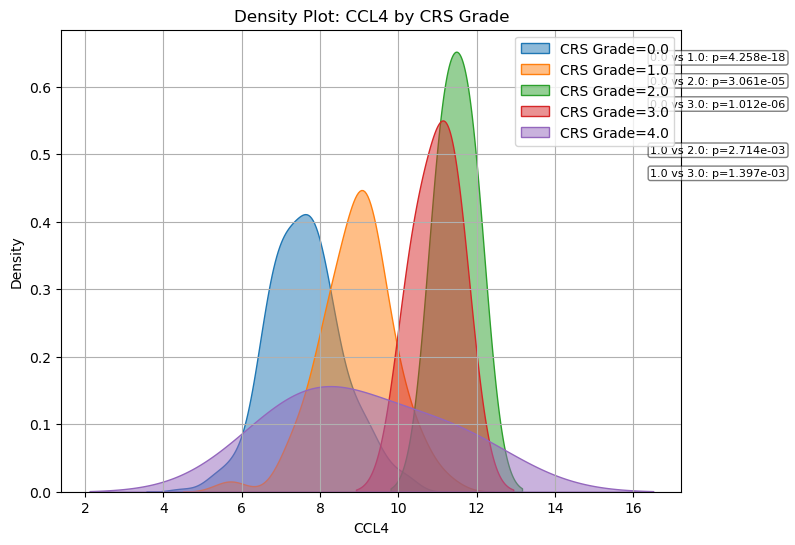

/var/folders/9q/_q_h4th94vj56dq6c3yv3gj80000gn/T/ipykernel_19052/522186879.py:32: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(
/var/folders/9q/_q_h4th94vj56dq6c3yv3gj80000gn/T/ipykernel_19052/522186879.py:32: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(
/var/folders/9q/_q_h4th94vj56dq6c3yv3gj80000gn/T/ipykernel_19052/522186879.py:32: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(
/var/folders/9q/_q_h4th94vj56dq6c3yv3gj80000gn/T/ipykernel_19052/522186879.py:32: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  s

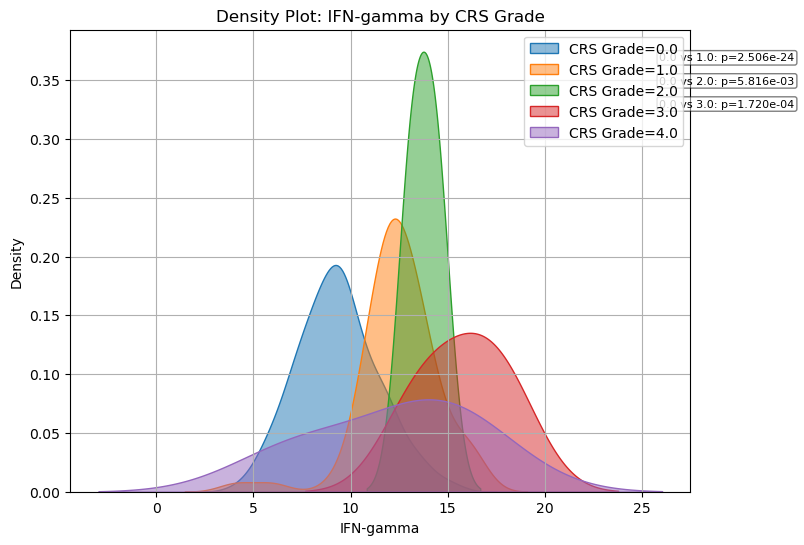

/var/folders/9q/_q_h4th94vj56dq6c3yv3gj80000gn/T/ipykernel_19052/522186879.py:32: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(
/var/folders/9q/_q_h4th94vj56dq6c3yv3gj80000gn/T/ipykernel_19052/522186879.py:32: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(
/var/folders/9q/_q_h4th94vj56dq6c3yv3gj80000gn/T/ipykernel_19052/522186879.py:32: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(
/var/folders/9q/_q_h4th94vj56dq6c3yv3gj80000gn/T/ipykernel_19052/522186879.py:32: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  s

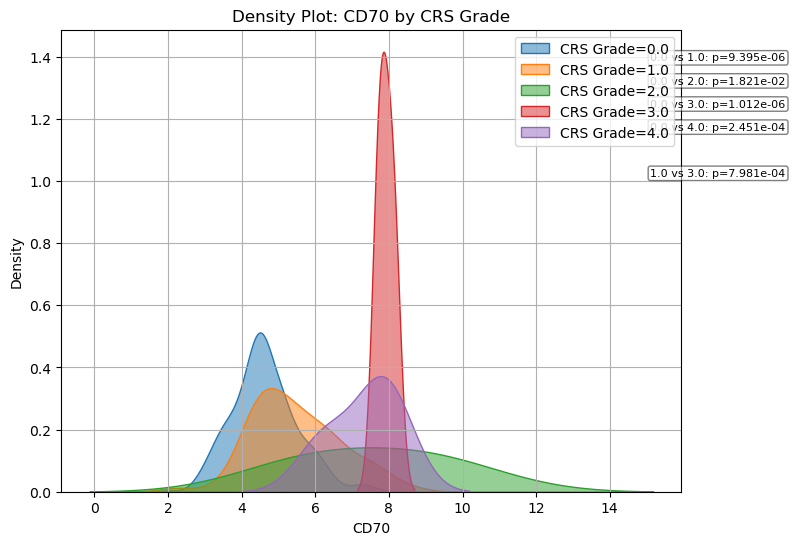

/var/folders/9q/_q_h4th94vj56dq6c3yv3gj80000gn/T/ipykernel_19052/522186879.py:32: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(
/var/folders/9q/_q_h4th94vj56dq6c3yv3gj80000gn/T/ipykernel_19052/522186879.py:32: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(
/var/folders/9q/_q_h4th94vj56dq6c3yv3gj80000gn/T/ipykernel_19052/522186879.py:32: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(
/var/folders/9q/_q_h4th94vj56dq6c3yv3gj80000gn/T/ipykernel_19052/522186879.py:32: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  s

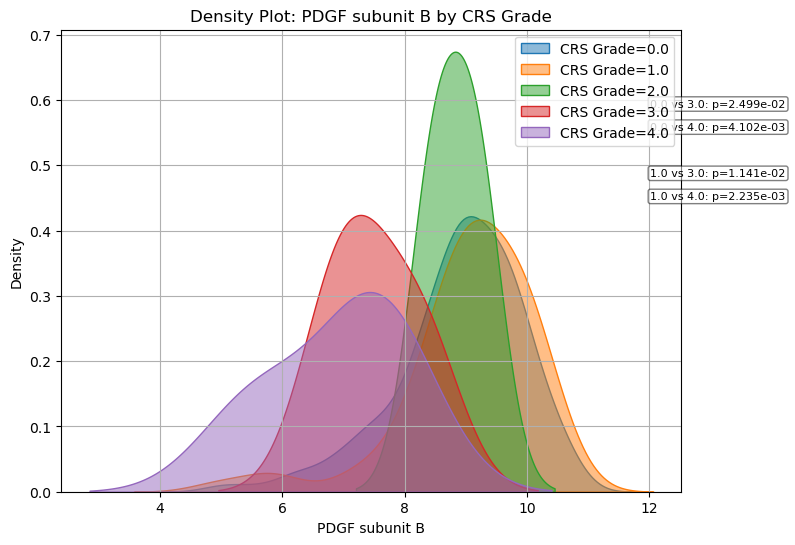


Kolmogorov-Smirnov Test Results (Before Correction):
  Variable  Group 1  Group 2  KS Statistic       p-value
0    MCP-2      0.0      1.0      0.508761  1.244261e-13
1    MCP-2      0.0      2.0      0.997222  9.182596e-05
2    MCP-2      0.0      3.0      0.969444  9.207892e-05
3    MCP-2      0.0      4.0      0.663889  7.863161e-02
4    MCP-2      1.0      2.0      0.953846  9.045681e-03

Kolmogorov-Smirnov Test Results with Bonferroni Correction:
  Variable  Group 1  Group 2  KS Statistic       p-value  \
0    MCP-2      0.0      1.0      0.508761  1.244261e-13   
1    MCP-2      0.0      2.0      0.997222  9.182596e-05   
2    MCP-2      0.0      3.0      0.969444  9.207892e-05   
3    MCP-2      0.0      4.0      0.663889  7.863161e-02   
4    MCP-2      1.0      2.0      0.953846  9.045681e-03   

   Bonferroni Corrected p-value  Significant (Bonferroni)  
0                  1.119835e-11                      True  
1                  8.264336e-03                      True  
2 

In [95]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from itertools import combinations
from statsmodels.stats.multitest import multipletests  # For multiple testing correction


columns_list = ['MCP-2', 'IL10', 'HGF', 'IL10', 'CCL23', 'CCL3', 'CCL4', 'IFN-gamma', 'CD70', 'PDGF subunit B']  
target_var = 'CRS Grade' 

# Remove duplicate 'IL10' if not intended
columns_list = list(dict.fromkeys(columns_list))  # Preserves order and removes duplicates

# Initialize a list to store all KS test results
ks_results = []

# Define unique CRS Grade categories
crs_categories = sorted(numerical_df[target_var].dropna().unique())

for col in columns_list:
    plt.figure(figsize=(8, 6))  
    
    # Dictionary to hold data for each CRS Grade
    data_dict = {}
    
    # Plot density plots for each CRS Grade
    for grade in crs_categories:
        data = numerical_df[numerical_df[target_var] == grade][col].dropna()
        data_dict[grade] = data
        sns.kdeplot(
            data,  
            label=f'{target_var}={grade}', shade=True, alpha=0.5
        )
    
    plt.title(f'Density Plot: {col} by {target_var}')  
    plt.xlabel(col) 
    plt.ylabel('Density')  
    plt.legend()  
    plt.grid(True)
    
    # Perform pairwise KS tests
    pairs = list(combinations(crs_categories, 2))
    for pair in pairs:
        grade1, grade2 = pair
        data1 = data_dict[grade1]
        data2 = data_dict[grade2]
        ks_stat, ks_pvalue = stats.ks_2samp(data1, data2)
        
        # Store the results
        ks_results.append({
            'Variable': col,
            'Group 1': grade1,
            'Group 2': grade2,
            'KS Statistic': ks_stat,
            'p-value': ks_pvalue
        })
        
        # Annotate significant results on the plot
        # Define a significance threshold (e.g., p < 0.05)
        alpha = 0.05
        if ks_pvalue < alpha:
            # Position the annotation based on the pair index to avoid overlap
            plt.text(0.95, 0.95 - 0.05 * pairs.index(pair), 
                     f'{grade1} vs {grade2}: p={ks_pvalue:.3e}', 
                     horizontalalignment='left', 
                     verticalalignment='top',
                     transform=plt.gca().transAxes,
                     fontsize=8,
                     bbox=dict(boxstyle='round,pad=0.2', facecolor='white', alpha=0.5))
    
    plt.show()

# Convert KS results to DataFrame
ks_results_df = pd.DataFrame(ks_results)

# Display the first few KS test results
print("\nKolmogorov-Smirnov Test Results (Before Correction):")
print(ks_results_df.head())

# Apply Bonferroni correction
p_values = ks_results_df['p-value'].values
reject, pvals_corrected, _, _ = multipletests(p_values, method='bonferroni')

ks_results_df['Bonferroni Corrected p-value'] = pvals_corrected
ks_results_df['Significant (Bonferroni)'] = reject

# Display the corrected results
print("\nKolmogorov-Smirnov Test Results with Bonferroni Correction:")
print(ks_results_df.head())

# Save the results to a CSV file (optional)
ks_results_df.to_csv('ks_test_results.csv', index=False)


In [81]:
numerical_df.isna().sum()

PT_ID                          0
Age                          210
CRS on date (0 No, 1 Yes)      0
CRS Grade                      0
LAP TGF-beta-1                 1
                            ... 
KLRD1                          1
GZMB                           1
CD83                           1
IL12                           1
CSF-1                          1
Length: 64, dtype: int64

Explained variance ratio is [0.54134677 0.14321616]


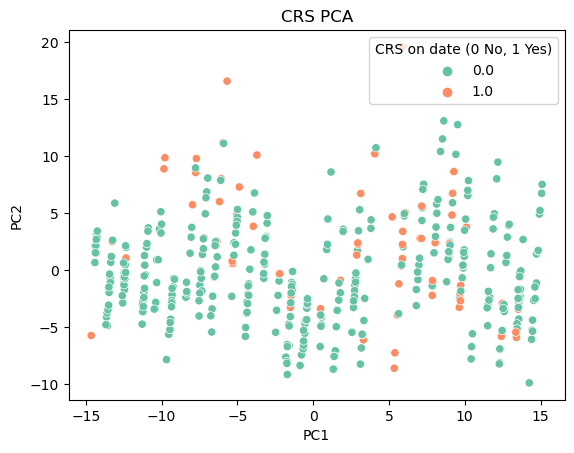

In [84]:
numerical_df_no_target = numerical_df.drop(columns=['CRS on date (0 No, 1 Yes)','CRS Grade','Age'])

pca = PCA(n_components=2)
pca_result = pca.fit_transform(numerical_df_no_target.dropna())
explained_variance = pca.explained_variance_ratio_

print("Explained variance ratio is", explained_variance)

pca_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])
pca_df['CRS on date (0 No, 1 Yes)'] = numerical_df['CRS on date (0 No, 1 Yes)']
pca_df['CRS Grade'] = numerical_df['CRS Grade']

plt.Figure(figsize=(8,6))
sns.scatterplot(x='PC1', y='PC2', hue='CRS on date (0 No, 1 Yes)', data=pca_df, palette='Set2')
plt.title("CRS PCA")
plt.show()


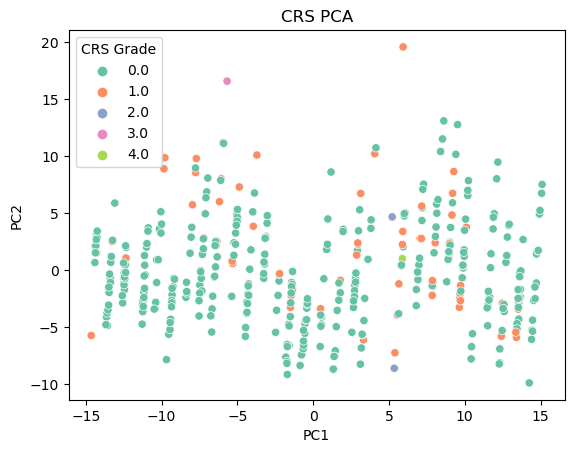

In [83]:
plt.Figure(figsize=(8,6))
sns.scatterplot(x='PC1', y='PC2', hue='CRS Grade', data=pca_df, palette='Set2')
plt.title("CRS PCA")
plt.show()

[0.54134677 0.14321616 0.067707  ]


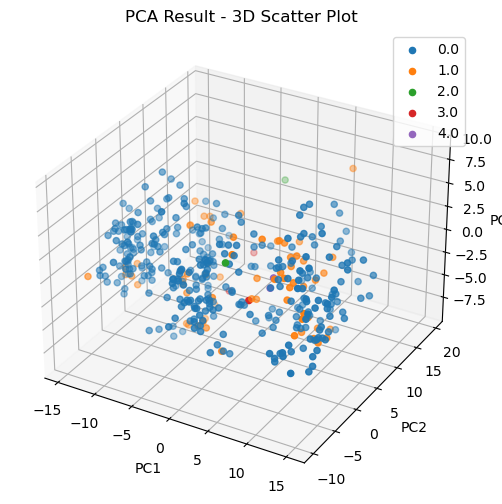

In [89]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Apply PCA with 3 components
pca = PCA(n_components=3)
pca_result = pca.fit_transform(numerical_df_no_target.dropna())
explained_variance = pca.explained_variance_ratio_
print(explained_variance)

# Convert PCA result into a DataFrame for visualization
pca_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2', 'PC3'])
pca_df['CRS on date (0 No, 1 Yes)'] = numerical_df['CRS on date (0 No, 1 Yes)']
pca_df['CRS Grade'] = numerical_df['CRS Grade']

# 3D Visualization
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Plotting each class separately for color coding
for t in set(pca_df['CRS Grade']):
    indices = pca_df['CRS Grade'] == t
    ax.scatter(pca_df.loc[indices, 'PC1'], pca_df.loc[indices, 'PC2'], pca_df.loc[indices, 'PC3'], label=t)

# Adding labels and title
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.title('PCA Result - 3D Scatter Plot')
plt.legend()
plt.show()